<a href="https://colab.research.google.com/github/Gagandeep1227/ML_lab/blob/main/spambase-BDT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

# Direct URL from UCI repository
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/spambase/spambase.data"

# Column names from dataset description
columns = [
    'word_freq_make','word_freq_address','word_freq_all','word_freq_3d','word_freq_our',
    'word_freq_over','word_freq_remove','word_freq_internet','word_freq_order','word_freq_mail',
    'word_freq_receive','word_freq_will','word_freq_people','word_freq_report','word_freq_addresses',
    'word_freq_free','word_freq_business','word_freq_email','word_freq_you','word_freq_credit',
    'word_freq_your','word_freq_font','word_freq_000','word_freq_money','word_freq_hp','word_freq_hpl',
    'word_freq_george','word_freq_650','word_freq_lab','word_freq_labs','word_freq_telnet','word_freq_857',
    'word_freq_data','word_freq_415','word_freq_85','word_freq_technology','word_freq_1999','word_freq_parts',
    'word_freq_pm','word_freq_direct','word_freq_cs','word_freq_meeting','word_freq_original',
    'word_freq_project','word_freq_re','word_freq_edu','word_freq_table','word_freq_conference',
    'char_freq_;','char_freq_(','char_freq_[','char_freq_!','char_freq_$','char_freq_#',
    'capital_run_length_average','capital_run_length_longest','capital_run_length_total','spam'
]

# Download and save the dataset
df = pd.read_csv(url, header=None, names=columns)
df.to_csv("spambase.csv", index=False)
print("✅ Spambase dataset downloaded and saved as spambase.csv")
print(df.shape)
df.head()


✅ Spambase dataset downloaded and saved as spambase.csv
(4601, 58)


,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


✅ Dataset Loaded Successfully!
Shape: (4601, 58)
   word_freq_make  word_freq_address  word_freq_all  word_freq_3d  \
0            0.00               0.64           0.64           0.0   
1            0.21               0.28           0.50           0.0   
2            0.06               0.00           0.71           0.0   
3            0.00               0.00           0.00           0.0   
4            0.00               0.00           0.00           0.0   

   word_freq_our  word_freq_over  word_freq_remove  word_freq_internet  \
0           0.32            0.00              0.00                0.00   
1           0.14            0.28              0.21                0.07   
2           1.23            0.19              0.19                0.12   
3           0.63            0.00              0.31                0.63   
4           0.63            0.00              0.31                0.63   

   word_freq_order  word_freq_mail  ...  char_freq_;  char_freq_(  \
0             0.00    

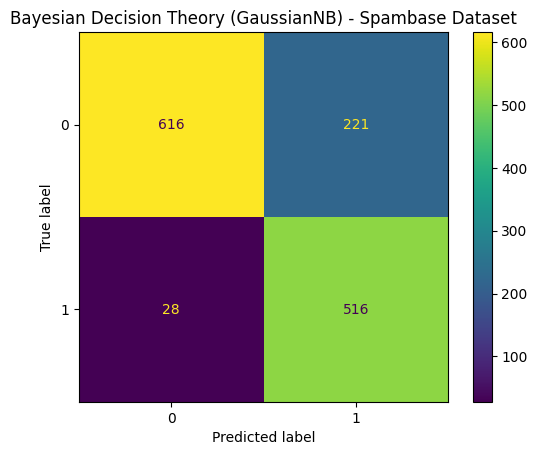


Sample Posterior Probabilities (Bayesian Decision Theory):
   True_Label  Predicted_Label  Posterior_P(Spam)  Posterior_P(Not_Spam)
0           0                0                0.0           1.000000e+00
1           0                0                0.0           1.000000e+00
2           1                1                1.0           1.241378e-81
3           1                1                1.0          5.900509e-234
4           1                1                1.0           4.638450e-49
5           0                0                0.0           1.000000e+00
6           0                1                1.0           5.056702e-15
7           1                1                1.0           3.497402e-62
8           1                0                0.0           1.000000e+00
9           0                1                1.0           3.873736e-26


In [2]:
# ============================================
# Bayesian Decision Theory (BDT) for Spambase Dataset
# ============================================

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import (
    accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay
)
import matplotlib.pyplot as plt

# ============================================
# 1. Load the Spambase dataset
# ============================================
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/spambase/spambase.data"

columns = [
    'word_freq_make','word_freq_address','word_freq_all','word_freq_3d','word_freq_our',
    'word_freq_over','word_freq_remove','word_freq_internet','word_freq_order','word_freq_mail',
    'word_freq_receive','word_freq_will','word_freq_people','word_freq_report','word_freq_addresses',
    'word_freq_free','word_freq_business','word_freq_email','word_freq_you','word_freq_credit',
    'word_freq_your','word_freq_font','word_freq_000','word_freq_money','word_freq_hp','word_freq_hpl',
    'word_freq_george','word_freq_650','word_freq_lab','word_freq_labs','word_freq_telnet','word_freq_857',
    'word_freq_data','word_freq_415','word_freq_85','word_freq_technology','word_freq_1999','word_freq_parts',
    'word_freq_pm','word_freq_direct','word_freq_cs','word_freq_meeting','word_freq_original',
    'word_freq_project','word_freq_re','word_freq_edu','word_freq_table','word_freq_conference',
    'char_freq_;','char_freq_(','char_freq_[','char_freq_!','char_freq_$','char_freq_#',
    'capital_run_length_average','capital_run_length_longest','capital_run_length_total','spam'
]

# Load directly from UCI site
df = pd.read_csv(url, header=None, names=columns)
print("✅ Dataset Loaded Successfully!")
print("Shape:", df.shape)
print(df.head())

# ============================================
# 2. Split Features and Target
# ============================================
X = df.drop(columns=['spam'])
y = df['spam']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# Standardize numeric features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# ============================================
# 3. Bayesian Decision Theory Model (Gaussian Naive Bayes)
# ============================================
bdt_model = GaussianNB()
bdt_model.fit(X_train_scaled, y_train)

# Make predictions
y_pred = bdt_model.predict(X_test_scaled)

# ============================================
# 4. Model Evaluation
# ============================================
print("\n=== Bayesian Decision Theory (BDT) Results ===")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_pred))
disp.plot()
plt.title("Bayesian Decision Theory (GaussianNB) - Spambase Dataset")
plt.show()

# ============================================
# 5. Posterior Probabilities (Bayesian Inference)
# ============================================
probs = bdt_model.predict_proba(X_test_scaled)
posterior_df = pd.DataFrame({
    'True_Label': y_test.values,
    'Predicted_Label': y_pred,
    'Posterior_P(Spam)': probs[:, 1],
    'Posterior_P(Not_Spam)': probs[:, 0]
})
print("\nSample Posterior Probabilities (Bayesian Decision Theory):")
print(posterior_df.head(10))
